# **Students Marks Predictor Using Machine Learning**

**The End to End Project Of Machine Learning Developed by Mabtoor Ul Shafiq**

## **1- Business Problem**

**The client Demand a Machine Learning Model which helps to predict the following problems**

**1-How Many Hours Required to get 90% Marks**

**2-How Many Hours Required to get 30% Marks**

**3- How many Marks we got after Studying 3 Hours a Day**

## **2-import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **3- Load Dataset**

In [2]:
student_dataset = pd.read_csv('student_info.csv')

In [3]:
student_dataset.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
student_dataset.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


## **4- Discover and Visualize Data**

In [5]:
student_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
student_dataset.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


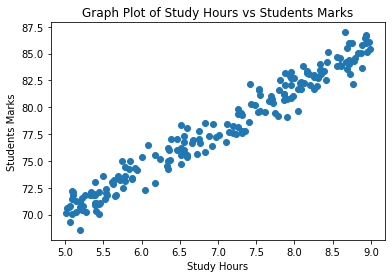

In [7]:
plt.scatter(student_dataset.study_hours, student_dataset.student_marks)
plt.xlabel('Study Hours')
plt.ylabel('Students Marks')
plt.title('Graph Plot of Study Hours vs Students Marks')
plt.show();

## **5- Prepare Dataset for Machine Learning Model**

**We have to clean the dataset so that it will be prepare for Machine Learning Model**

In [8]:
student_dataset.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

**As We have Seen There is Some Missing Data in our Dataset so we derive mean value and put the mean value in missing data**

In [9]:
student_dataset.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [10]:
student_data_clean = student_dataset.fillna(student_dataset.mean())

In [11]:
student_data_clean.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
student_data_clean.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


**Now We have No Missing Value. Its Time to Select the Machine Learning Models and Train our dataset.**

**But Before Apply ML Model , We have to split the dataset into train and test** 

In [13]:
X = student_data_clean.drop("student_marks", axis = "columns")
y = student_data_clean.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


## **6- Select The Model**

 **As We Have Seen Our Plot Show Linearity and We have Continious value so we used Linear Regression Machine Learning Model**

In [15]:
from sklearn.linear_model  import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

## **7- Predict Our Data**

In [18]:
lr.predict([[4]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


66.19022710353573

In [30]:
y_pred = lr.predict(X_test)
y_pred[:5]

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896]])

### **Compare The Dataset From Original Value with Predicted Value**

In [26]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Study_Hours", "Actual_Marks","Predicted Marks"]).head(10)

,Study_Hours,Actual_Marks,Predicted Marks
0,8.30,82.02,83.113815
1,7.23,77.55,78.902596
2,8.67,84.19,84.570030
3,8.99,85.46,85.829460
4,8.71,84.03,84.727459
5,7.70,80.81,80.752384
6,5.69,73.61,72.841591
7,5.39,70.90,71.660875
8,5.79,73.14,73.235162
9,5.39,73.02,71.660875


## **8- Fine-Tune The Model**

In [21]:
lr.score(X_test, y_test)

0.9514124242154466

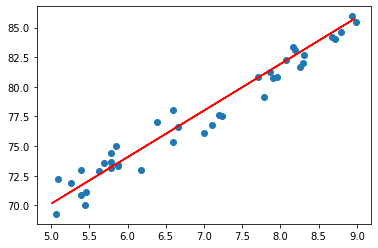

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

**The Straight Line Show That Our Model Run Perfectly**

## **Save Machine Learning Model For Web Apps/ Mobile Apps**

In [23]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [24]:
model = joblib.load("student_mark_predictor.pkl")

In [25]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


70.12594512018406